In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('iris_csv.csv')
iris[0:5]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


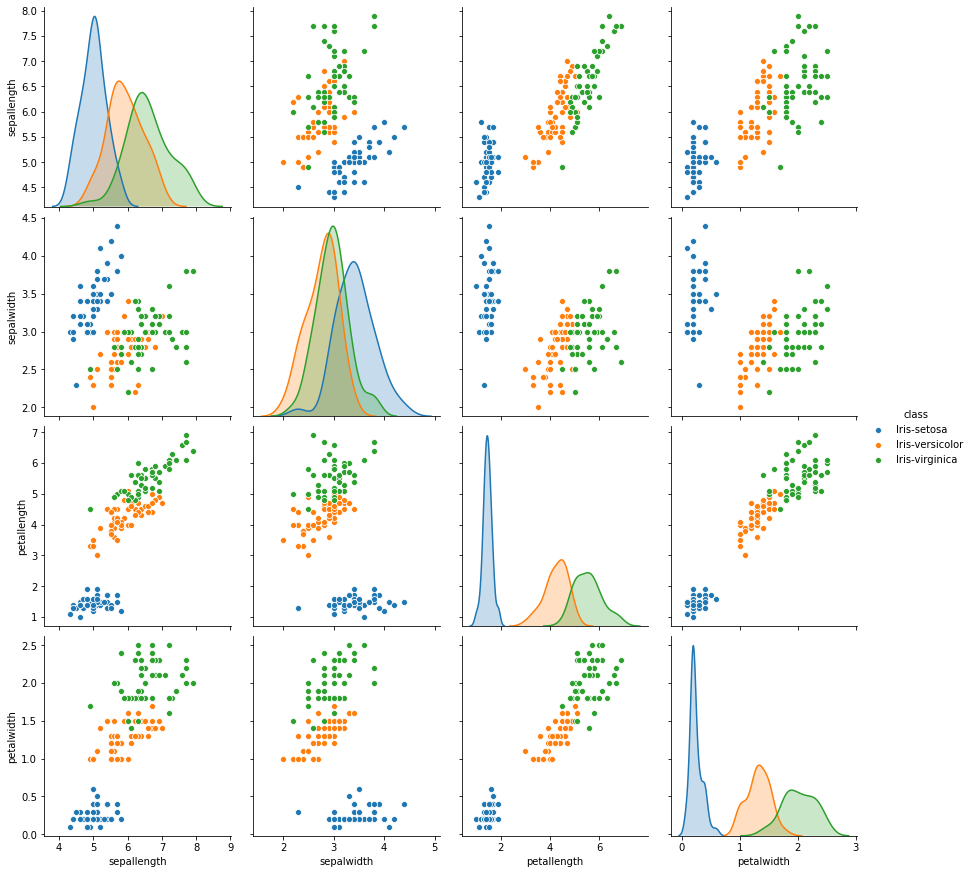

In [3]:
sns.pairplot(iris,hue="class",height=3)
plt.show()

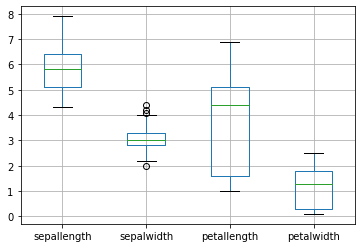

In [4]:
iris.boxplot(column=['sepallength','sepalwidth','petallength','petalwidth'])
plt.show() 

In [5]:
X = iris[['sepallength','sepalwidth','petallength','petalwidth']]
X[0:5]

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
Y = iris["class"]
Y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=1)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (124, 4) (124,)
Test set: (23, 4) (23,)


In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='saga').fit(X_train,Y_train)
yhat = LR.predict(X_test)

from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat, average='weighted')

C:\Users\acer\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.5362318840579711

In [17]:
yhat_prob = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
log_loss(Y_test, yhat_prob)

0.7042178526599576

In [18]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train,Y_train)
yhat1 = DT.predict(X_test)

from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, yhat1))

DecisionTrees's Accuracy:  0.9130434782608695


In [19]:
# K Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)
yhat2 = KNN.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat2))

Train set Accuracy:  0.9596774193548387
Test set Accuracy:  0.9130434782608695


In [22]:
from sklearn import svm
SVM1 = svm.SVC(kernel='rbf').fit(X_train, Y_train) 
yhat3 = SVM1.predict(X_test)

from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat3, average = 'weighted')

0.9217391304347826